In [6]:
using Pkg
Pkg.activate("../")

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
   Installed Expat_jll ──────────────────── v2.4.8+0
   Installed Qt5Base_jll ────────────────── v5.15.3+2
   Installed XSLT_jll ───────────────────── v1.1.34+0
   Installed libvorbis_jll ──────────────── v1.3.7+1
   Installed Ogg_jll ────────────────────── v1.3.5+1
   Installed Xorg_libXfixes_jll ─────────── v5.0.3+4
   Installed RelocatableFolders ─────────── v1.0.0
   Installed Plots ──────────────────────── v1.38.8
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed Xorg_libXext_jll ───────────── v1.3.4+4
   Installed Gettext_jll ────────────────── v0.21.0+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed RecipesPipeline ────────────── v0.6.11
   Installed LAME_jll ───────────────────── v3.100.1+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed SimpleBufferStream ─────────── v

  [dfaa095f] + x265_jll v3.5.0+0
  [d8fb68d0] + xkbcommon_jll v1.4.1+0
  [e66e0078] + CompilerSupportLibraries_jll
  [05823500] + OpenLibm_jll
  [efcefdf7] + PCRE2_jll
Precompiling project...
  ✓ Pipe
  ✓ PCRE2_jll
  ✓ Unzip
  ✓ BitFlags
  ✓ Contour
  ✓ SimpleBufferStream
  ✓ LoggingExtras
  ✓ Scratch
  ✓ Measures
  ✓ IniFile
  ✓ UnicodeFun
  ✓ URIs
  ✓ Grisu
  ✓ TranscodingStreams
  ✓ Libffi_jll
  ✓ Zstd_jll
  ✓ Xorg_libXdmcp_jll
  ✓ Opus_jll
  ✓ Wayland_protocols_jll
  ✓ Expat_jll
  ✓ LZO_jll
  ✓ Libgpg_error_jll
  ✓ Xorg_libXau_jll
  ✓ Libmount_jll
  ✓ JpegTurbo_jll
  ✓ libpng_jll
  ✓ Libiconv_jll
  ✓ Latexify
  ✓ Pixman_jll
  ✓ FriBidi_jll
  ✓ Ogg_jll
  ✓ Xorg_xtrans_jll
  ✓ libaom_jll
  ✓ LAME_jll
  ✓ Graphite2_jll
  ✓ fzf_jll
  ✓ x265_jll
  ✓ LERC_jll
  ✓ Bzip2_jll
  ✓ Xorg_libpthread_stubs_jll
  ✓ Libuuid_jll
  ✓ Showoff
  ✓ RelocatableFolders
  ✓ x264_jll
  ✓ CodecZlib
  ✓ libfdk_aac_jll
  ✓ JLFzf
  ✓ Libgcrypt_jll
  ✓ XML2_jll
  ✓ libvorbis_jll
  ✓ Libtiff_jll
  ✓ FreeType2_jl

In [14]:
Pkg.add("Plots")
Pkg.add("Distributions")
Pkg.add("LightGraphs")
Pkg.add("NamedArrays")

   Resolving package versions...
  No Changes to `~/Research/Projects/flow-maps/MMCA_with_vaccination/Project.toml`
  No Changes to `~/Research/Projects/flow-maps/MMCA_with_vaccination/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Research/Projects/flow-maps/MMCA_with_vaccination/Project.toml`
  No Changes to `~/Research/Projects/flow-maps/MMCA_with_vaccination/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Research/Projects/flow-maps/MMCA_with_vaccination/Project.toml`
  No Changes to `~/Research/Projects/flow-maps/MMCA_with_vaccination/Manifest.toml`
   Resolving package versions...
   Installed Combinatorics ─ v1.0.2
   Installed NamedArrays ─── v0.9.7
    Updating `~/Research/Projects/flow-maps/MMCA_with_vaccination/Project.toml`
  [86f7a689] + NamedArrays v0.9.7
    Updating `~/Research/Projects/flow-maps/MMCA_with_vaccination/Manifest.toml`
  [861a8166] + Combinatorics v1.0.2
  [86f7a689] + NamedArrays v0.9.7
Precompiling project...
  ✓ Co

In [15]:
using Plots
using MMCAcovid19
using Random
using Distributions
using LightGraphs
using NamedArrays
using LinearAlgebra

In [16]:
# Number of strata
G = 3

# Number of patches
M = 5

g_probs = [0.1, 0.6, 0.3]
m_probs = [0.05, 0.10, 0.15, 0.30, 0.40]
probs = transpose(m_probs) .* g_probs
total_population = 1000000
distrib = Multinomial(total_population, reshape(probs, (1, G * M))[1, :])
nᵢᵍ = convert.(Float64, reshape(rand(distrib), (G, M)))

# Strata contacts
C = [0.5980 0.3849 0.0171
     0.2440 0.7210 0.0350
     0.1919 0.5705 0.2376]

# network
network = erdos_renyi(M, 0.7, is_directed=true)
for i in 1:M
  add_edge!(network, i, i)   # add self-loops
end
# list of edges
L = ne(network)
edgelist = zeros(Int64, L, 2)
edgelist[:, 1] .= src.(edges(network))
edgelist[:, 2] .= dst.(edges(network))
# list of commuting probabilities
Rᵢⱼ = rand(L)
sum_r = zeros(M)
for e in 1:L   # find output strengths
  i = edgelist[e, 1]
  sum_r[i] += Rᵢⱼ[e]
end
for e in 1:L   # normalize weights
  i = edgelist[e, 1]
  Rᵢⱼ[e] /= sum_r[i]
end

# Average number of contacts per strata
kᵍ = [11.8, 13.3, 6.6]

# Average number of contacts at home per strata
kᵍ_h = [3.15, 3.17, 3.28]

# Average number of contacts at work per strata
kᵍ_w = [1.72, 5.18, 0.0]

# Degree of mobility per strata
pᵍ = [0.0, 1.0, 0.05]

# Patch surfaces (in km²)
sᵢ = [10.6, 23.0, 26.6, 5.7, 61.6]

# Density factor
ξ = 0.01

# Average household size
σ = 2.5

# Infectivity of infected
βᴵ = 0.075

# Infectivity of asymptomatic
βᴬ = 0.5 * βᴵ

# Exposed rate
ηᵍ = [1/2.444, 1/2.444, 1/2.444]

# Asymptomatic infectious rate
αᵍ = [1/5.671, 1/2.756, 1/2.756]

# Infectious rate
μᵍ = [1/1.0, 1/3.915, 1/3.915]

# Direct death probability
θᵍ = [0.0, 0.008, 0.047]

# ICU probability
γᵍ = [0.0003, 0.003, 0.026]

# Pre-deceased rate
ζᵍ = [1/7.084, 1/7.084, 1/7.084]

# Pre-hospitalized in ICU rate
λᵍ = [1/4.084, 1/4.084, 1/4.084]

# Fatality probability in ICU
ωᵍ = [0.3, 0.3, 0.3]

# Death rate in iCU
ψᵍ = [1/7.0, 1/7.0, 1/7.0]

# ICU discharge rate
χᵍ = [1/20.0, 1/20.0, 1/20.0]

3-element Vector{Float64}:
 0.05
 0.05
 0.05

In [18]:
# Number of timesteps
T = 10

# Initial number of exposed individuals
E₀ = zeros(G, M)

# Initial number of infectious asymptomatic individuals
A₀ = zeros(G, M)
A₀[2, 5] = 2.0
A₀[3, 3] = 1.0

# Initial number of infectious symptomatic individuals
I₀ = zeros(G, M)
I₀[2, 5] = 1.0

1.0

In [19]:
# Timestep of application of containment
tᶜ = 30

# Mobility reduction
κ₀ = 0.65

# Permeability of confined households
ϕ = 0.174

# Social distancing
δ = 0.207

# List of timesteps of application of containments
tᶜs = [30, 60, 90, 120]

# List of mobility reductions
κ₀s = [0.65, 0.65, 0.65, 0.55]

# List of permeabilities of confined households
ϕs = [0.174, 0.174, 0.174, 0.174]

# List of social distancings
δs = [0.207, 0.207, 0.207, 0.207]

4-element Vector{Float64}:
 0.207
 0.207
 0.207
 0.207

In [20]:
using DataFrames
using Distributions
using Plots


function sample_initial_parameters(num_params)
    DataFrame(
        id=1:num_params,
        beta=rand(Uniform(0, 0.1), num_params),
        scale_beta=rand(Uniform(0.4, 0.6), num_params)
    )
end

function resample_parameters(accepted, num_params)
    params_names = ["beta", "scale_beta"]
    Σ = cov(Array(accepted[:, params_names]))
    μ = mean(Array(accepted[:, params_names]), dims=1)[1,:]
    values = rand(MvNormal(μ, Σ), num_params)
    df = DataFrame(transpose(values), params_names)
    df[:, "id"] = 1:num_params
    return df
end

function resample_compartments(compartments, sample_size=10000)
    # Resample compartments at a given time
    # Input compartments should have shape: (G, M, num_compartments, num_params)
    # Output have the same shape as input
    G, M, num_compartments, num_params = size(compartments)
    X = transpose(reshape(compartments[:,:,:,:], (G*M*num_compartments, num_params)))
    μ = mean(X, dims=1)[1,:]
    Σ = cov(X)
    Σ = Σ + 1e-15*I # avoid problem: "Cholesky factorization failed", as some variables appear to be linear combinations of others, I think it might be (i did not checked) several age groups of the same patch. More info here: https://stackoverflow.com/questions/57559589/distributions-jl-do-not-accept-my-non-positive-definite-covariance-function-w
    new_compartments = rand(MvNormal(μ, Σ), sample_size)
    return reshape(new_compartments, (G, M, num_compartments, sample_size))
end


function calculate_incidence(epi_params, population)
    prevalence = sum((epi_params.ρᴵᵍ[:, :, 1:epi_params.T] .+
                                       epi_params.ρᴴᴰᵍ[:, :, 1:epi_params.T] .+
                                       epi_params.ρᴴᴿᵍ[:, :, 1:epi_params.T] .+
                                       epi_params.ρᴾᴴᵍ[:, :, 1:epi_params.T] .+
                                       epi_params.ρᴾᴰᵍ[:, :, 1:epi_params.T] .+
                                       epi_params.ρᴰᵍ[:, :, 1:epi_params.T] .+
                                       epi_params.ρᴿᵍ[:, :, 1:epi_params.T] .+
                                       epi_params.ρᴬᵍ[:, :, 1:epi_params.T] .+
                                       epi_params.ρᴱᵍ[:, :, 1:epi_params.T]) .*
                                      population.nᵢᵍ, dims = (1))[1,:,:]
    incidence = diff(prevalence, dims=2)
    return incidence, prevalence
end

function compartments_as_matrix(epi_params, population)
    num_compartments = 10
    compartments_names = ["S", "E", "A", "I", "PH", "PD", "HR", "HD", "D", "R"]
    compartments = NamedArray(
        zeros(population.G, population.M, epi_params.T, num_compartments),
        (1:population.G, 1:population.M, 1:epi_params.T, compartments_names),
        ("G", "M", "t", "compartment")
    )
    compartments[:, :, :, 1] = epi_params.ρˢᵍ .* population.nᵢᵍ
    compartments[:, :, :, 2] = epi_params.ρᴱᵍ .* population.nᵢᵍ
    compartments[:, :, :, 3] = epi_params.ρᴬᵍ .* population.nᵢᵍ
    compartments[:, :, :, 4] = epi_params.ρᴵᵍ .* population.nᵢᵍ
    compartments[:, :, :, 5] = epi_params.ρᴾᴴᵍ .* population.nᵢᵍ
    compartments[:, :, :, 6] = epi_params.ρᴾᴰᵍ .* population.nᵢᵍ
    compartments[:, :, :, 7] = epi_params.ρᴴᴿᵍ .* population.nᵢᵍ
    compartments[:, :, :, 8] = epi_params.ρᴴᴰᵍ .* population.nᵢᵍ
    compartments[:, :, :, 9] = epi_params.ρᴰᵍ .* population.nᵢᵍ
    compartments[:, :, :, 10] = epi_params.ρᴿᵍ .* population.nᵢᵍ
    return compartments
end

function store_compartments!(compartments, i, epi_params, population)
    compartments[:, :, :, 1, i] = epi_params.ρˢᵍ .* population.nᵢᵍ
    compartments[:, :, :, 2, i] = epi_params.ρᴱᵍ .* population.nᵢᵍ
    compartments[:, :, :, 3, i] = epi_params.ρᴬᵍ .* population.nᵢᵍ
    compartments[:, :, :, 4, i] = epi_params.ρᴵᵍ .* population.nᵢᵍ
    compartments[:, :, :, 5, i] = epi_params.ρᴾᴴᵍ .* population.nᵢᵍ
    compartments[:, :, :, 6, i] = epi_params.ρᴾᴰᵍ .* population.nᵢᵍ
    compartments[:, :, :, 7, i] = epi_params.ρᴴᴿᵍ .* population.nᵢᵍ
    compartments[:, :, :, 8, i] = epi_params.ρᴴᴰᵍ .* population.nᵢᵍ
    compartments[:, :, :, 9, i] = epi_params.ρᴰᵍ .* population.nᵢᵍ
    compartments[:, :, :, 10, i] = epi_params.ρᴿᵍ .* population.nᵢᵍ
end

function set_compartments!(epi_params, compartments)
    @assert size(compartments) == (size(epi_params.ρˢᵍ)[1], size(epi_params.ρˢᵍ)[2], 10)
    total_population = sum(compartments, dims=(3))[:,:,1]
    epi_params.ρˢᵍ[:,:,1] .= compartments[:, :, 1] ./ total_population
    epi_params.ρᴱᵍ[:,:,1] .= compartments[:, :, 2] ./ total_population
    epi_params.ρᴬᵍ[:,:,1] .= compartments[:, :, 3] ./ total_population
    epi_params.ρᴵᵍ[:,:,1] .= compartments[:, :, 4] ./ total_population
    epi_params.ρᴾᴴᵍ[:,:,1] .= compartments[:, :, 5] ./ total_population
    epi_params.ρᴾᴰᵍ[:,:,1] .= compartments[:, :, 6] ./ total_population
    epi_params.ρᴴᴿᵍ[:,:,1] .= compartments[:, :, 7] ./ total_population
    epi_params.ρᴴᴰᵍ[:,:,1] .= compartments[:, :, 8] ./ total_population
    epi_params.ρᴰᵍ[:,:,1] .= compartments[:, :, 9] ./ total_population
    epi_params.ρᴿᵍ[:,:,1] .= compartments[:, :, 10] ./ total_population
end


function run_simulation(T; initial_compartments=nothing)
    population = Population_Params(G, M, nᵢᵍ, kᵍ, kᵍ_h, kᵍ_w, C, pᵍ, edgelist, Rᵢⱼ, sᵢ, ξ, σ)
    epi_params = Epidemic_Params(βᴵ, βᴬ, ηᵍ, αᵍ, μᵍ, θᵍ, γᵍ, ζᵍ, λᵍ, ωᵍ, ψᵍ, χᵍ, G, M, T)
    
    reset_params!(epi_params, population)
    
    if initial_compartments != nothing
        set_compartments!(epi_params, initial_compartments)
    else
        set_initial_infected!(epi_params, population, E₀, A₀, I₀)
    end

    # Run the model
    run_epidemic_spreading_mmca!(epi_params, population; verbose = true)
    
    return epi_params, population
end

function plot_simulation(compartments)
    totals = sum(compartments, dims=(1,2))[1,1,:,:]
    plot([totals[:, "E"], totals[:, "A"], totals[:, "I"], totals[:, "D"]], label=["E" "A" "I" "D"])
end

function RMSE(x, y; sumpatches=true)
    # esta funcion calcula el Root Mean Square Error de cada trajectoria simulada (x)
    # contra la trajectoria real (y), generando un vector de errores, uno por cada parche
    # Las dimensiones deben ser: 
    #  x = ("parche", "tiempo", "simulacion") ó ("parche", "tiempo")
    #  y = ("parche", "tiempo")
    e = x .- y
    se = map(abs2, e)
    mse = mean(se, dims=2)
    rmse = map(sqrt, mse)
    if sumpatches
        return sum(rmse, dims=1)
    else
        return rmse
    end
end


function prevalence_and_incidence(simulations)
    prevalence = sum(simulations[:,:,:,1:10 .!= 1,:], dims=(1,4))[1,:,:,1,:]
    incidence = diff(prevalence, dims=2)
    return prevalence, incidence
end

# prevalence_and_incidence(simulations)

prevalence_and_incidence (generic function with 1 method)

(3, 5, 300, 10)

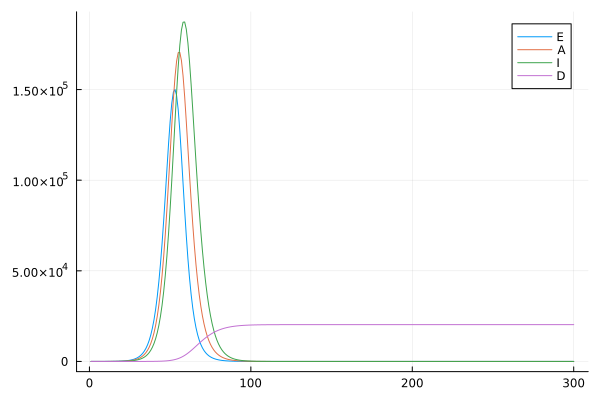

In [21]:
# CONTROL SIMULATION

population1 = Population_Params(G, M, nᵢᵍ, kᵍ, kᵍ_h, kᵍ_w, C, pᵍ, edgelist, Rᵢⱼ, sᵢ, ξ, σ)
epi_params1 = Epidemic_Params(βᴵ, βᴬ, ηᵍ, αᵍ, μᵍ, θᵍ, γᵍ, ζᵍ, λᵍ, ωᵍ, ψᵍ, χᵍ, G, M, 300)

# Run the model
reset_params!(epi_params1, population1)
set_initial_infected!(epi_params1, population1, E₀, A₀, I₀)
run_epidemic_spreading_mmca!(epi_params1, population1; verbose = false)

incidence1, prevalence1 = calculate_incidence(epi_params1, population1)

compartments1 = compartments_as_matrix(epi_params1, population1)
print(size(compartments1))
plot_simulation(compartments1)

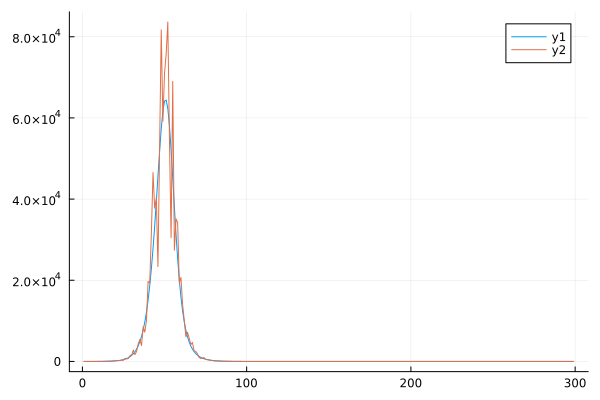

In [22]:
incidence1_noise = incidence1 .* rand(Normal(1, 0.5), (5, 299))
plot([sum(incidence1, dims=1)[1,:], sum(incidence1_noise, dims=1)[1,:]])

In [5]:
function run_simulations(df, realIncidence, T; initial_compartments=nothing)
    num_params = size(df)[1]
    
    # reusable structures
    population = Population_Params(G, M, nᵢᵍ, kᵍ, kᵍ_h, kᵍ_w, C, pᵍ, edgelist, Rᵢⱼ, sᵢ, ξ, σ)
    epi_params = Epidemic_Params(βᴵ, βᴬ, ηᵍ, αᵍ, μᵍ, θᵍ, γᵍ, ζᵍ, λᵍ, ωᵍ, ψᵍ, χᵍ, G, M, T)

    # Arrays where the output variables will be stored
    prevalence = zeros(Float64, M, T, num_params)
    incidence  = zeros(Float64, M, T - 1, num_params)
    compartments = zeros(Float64, G, M, T, num_compartments, num_params)
    
    for i in 1:num_params
        # Set epidemic params to the ones speficied on the DF
        
        params_names = ["beta", "scale_beta"]
        beta, scale_beta = df[i, params_names]
        epi_params.βᴵ .= beta
        epi_params.βᴬ .= scale_beta * beta
        
        reset_params!(epi_params, population)

        if initial_compartments != nothing
            if length(size(initial_compartments)) == 3
                set_compartments!(epi_params, initial_compartments)
            else
                set_compartments!(epi_params, initial_compartments[:,:,:,i])
            end
        else
            set_initial_infected!(epi_params, population, E₀, A₀, I₀)
        end

        # Run the model
        run_epidemic_spreading_mmca!(epi_params, population; verbose = false)

        # Store compartments
        store_compartments!(compartments, i, epi_params, population)

        # Calculate prevalence and incidence
        prevalence[:,:,i] = sum((epi_params.ρᴵᵍ[:, :, 1:epi_params.T] .+
                                       epi_params.ρᴴᴰᵍ[:, :, 1:epi_params.T] .+
                                       epi_params.ρᴴᴿᵍ[:, :, 1:epi_params.T] .+
                                       epi_params.ρᴾᴴᵍ[:, :, 1:epi_params.T] .+
                                       epi_params.ρᴾᴰᵍ[:, :, 1:epi_params.T] .+
                                       epi_params.ρᴰᵍ[:, :, 1:epi_params.T] .+
                                       epi_params.ρᴿᵍ[:, :, 1:epi_params.T] .+
                                       epi_params.ρᴬᵍ[:, :, 1:epi_params.T] .+
                                       epi_params.ρᴱᵍ[:, :, 1:epi_params.T]) .*
                                          population.nᵢᵍ, dims = (1))[1,:,:]
        incidence[:,:,i] = diff(prevalence[:,:,i], dims=2)
    end
    score = RMSE(incidence, realIncidence)[1,1,:]
    df[!, "score"] = score
    accepted_params = sort(df, "score")[1:num_accept, :]
    accepted_indexes = accepted_params[:, "id"]
    accepted_compartments = compartments[:,:,:,:,accepted_indexes]
    accepted_incidence = incidence[:,:,accepted_indexes]
    return accepted_params, accepted_compartments, accepted_incidence
end

run_simulations (generic function with 1 method)

In [6]:
# run 10 iterations of ABC to fit the first time window

function optimization(params, initial_comps, real_incidence; rounds=5)

    acc_params = nothing
    acc_compartments = nothing
    acc_incidence = nothing

    for i in 1:rounds
        acc_params, acc_compartments, acc_incidence = run_simulations(params, real_incidence, window_size+1, initial_compartments=initial_comps)
        params = resample_parameters(acc_params, num_simulations)
    end

    return acc_params, acc_compartments, acc_incidence
end


optimization (generic function with 1 method)

In [7]:


num_windows = 9
window_size = 10
T = 100
num_compartments = 10
num_simulations = 10000
num_accept = 100


function choose_initial_compartments(acc_compartments, acc_incidence, real_incidence)
    # first compute diferences and then aggregate patches
    # Targets: incidence trajectory for each CCAA
    distances_at_last = sum(acc_incidence[:,window_size,:] .- real_incidence[:,window_size], dims=(1))
    return argmin(distances_at_last)[2]
end

function choose_initial_compartments2(acc_compartments, acc_incidence, real_incidence)
    # aggregate patches, and then compute difference
    # Target: incidence trajectory at Spain level
    incidence_at_last = sum(acc_incidence[:,window_size,:], dims=1)[1,:]
    real_incid_at_last = sum(real_incidence[:,window_size], dims=1)[1,1]
    distances = (incidence_at_last .- real_incid_at_last)
    # print(distances)
    return argmin(distances)
end


params = sample_initial_parameters(num_simulations)
initial_comps = compartments1[:,:,1,:]
initial_comps[:,:,4] = initial_comps[:,:,4] .+ 10
initial_comps[:,:,1] = initial_comps[:,:,1] .- 10

simulations = zeros(G, M, window_size+1, num_compartments, num_windows)
incidences = zeros(M, window_size, num_windows)
incidencesAll = zeros(M, window_size, num_accept, num_windows)
t = 1

for i in 1:num_windows
    
    real_incidence = incidence1_noise[:,t:t+window_size-1]

    params = sample_initial_parameters(num_simulations)
    acc_params, acc_compartments, acc_incidence = optimization(params, initial_comps, real_incidence, rounds=1)
    
    best = choose_initial_compartments2(acc_compartments, acc_incidence, real_incidence)
    println("$t: ", acc_params[1,"score"], " Best: $best")

    initial_comps = acc_compartments[:,:,window_size+1,:,best]

    simulations[:,:,:,:,i] = acc_compartments[:,:,:,:,best] # save best simulation
    incidences[:,:,i] = acc_incidence[:,:,best]
    incidencesAll[:,:,:,i] = acc_incidence
    t += window_size
end


1: 6.786002636467756 Best: 100
11: 53.81221629921592 Best: 100
21: 527.0131665870888 Best: 100
31: 3672.810575446979 Best: 100
41: 20424.83848850714 Best: 70
51: 23087.545740596972 Best: 100
61: 3719.164285467429 Best: 87
71: 273.07452168776376 Best: 90
81: 34.07236094394246 Best: 98


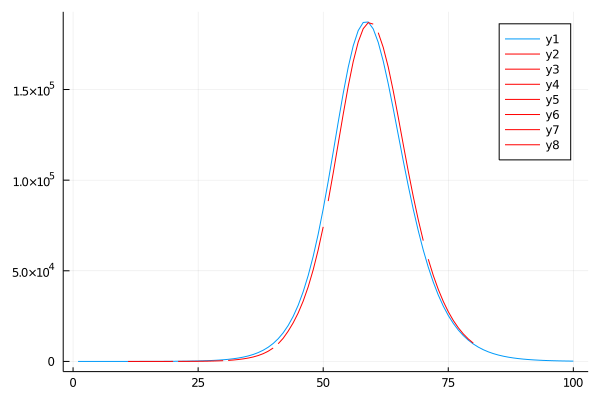

In [8]:

function plot_simulation!(compartments, w, l)
    x = 1+(window_size*(w-1)):window_size*(w-1)+window_size
    x = x[1:l]
    y = sum(compartments[:,:,:,comp,w], dims=(1,2))[1,1,:]
    y = y[1:l]
    plot!(x, y, color="red", layout=(2,2))
end

comp = 4 
npoints = window_size

plot(sum(compartments1, dims=(1,2))[1,1,1:100,comp])
plot_simulation!(simulations, 2, npoints)
plot_simulation!(simulations, 3, npoints)
plot_simulation!(simulations, 4, npoints)
plot_simulation!(simulations, 5, npoints)
plot_simulation!(simulations, 6, npoints)
plot_simulation!(simulations, 7, npoints)
plot_simulation!(simulations, 8, npoints)
# plot_simulation!(simulations, 9, npoints)


1:10
11:20
21:30
31:40
41:50
51:60
61:70
71:80


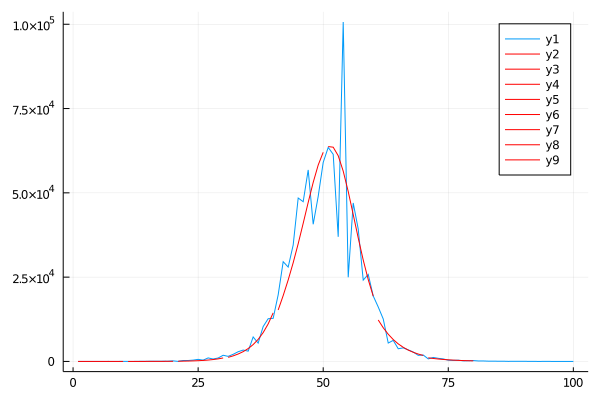

In [9]:
# incidence plot

function plot_incidence!(incidences, w, l)
    x = 1+(window_size*(w-1)):window_size*(w-1)+window_size
    println(x)
    x = x[1:l]
    y = sum(incidences[:,:,w], dims=(1))[1,:,:]
    y = y[1:l]
    plot!(x, y, color="red", layout=(2,2))
end

plot(sum(incidence1_noise, dims=1)[1,1:100])
plot_incidence!(incidences, 1, npoints)
plot_incidence!(incidences, 2, npoints)
plot_incidence!(incidences, 3, npoints)
plot_incidence!(incidences, 4, npoints)
plot_incidence!(incidences, 5, npoints)
plot_incidence!(incidences, 6, npoints)
plot_incidence!(incidences, 7, npoints)
plot_incidence!(incidences, 8, npoints)


In [10]:
function plot_multiple_trajectories!(incidences, w, l)
    x = 1+(window_size*(w-1)):window_size*(w-1)+window_size
    x = x[1:l]
    y = sum(incidences[:,:,:,w], dims=(1))[1,:,:]
    y = y[1:l, :]
    plot!(x, y, color="red", layout=(2,2))
end


plot(sum(incidence1_noise, dims=1)[1,1:100])
plot_multiple_trajectories!(incidencesAll, 1, npoints)
plot_multiple_trajectories!(incidencesAll, 2, npoints)
plot_multiple_trajectories!(incidencesAll, 3, npoints)
plot_multiple_trajectories!(incidencesAll, 4, npoints)
plot_multiple_trajectories!(incidencesAll, 5, npoints)
plot_multiple_trajectories!(incidencesAll, 6, npoints)
plot_multiple_trajectories!(incidencesAll, 7, npoints)
plot_multiple_trajectories!(incidencesAll, 8, npoints)

# NOTA: Aqui no se ve ese efecto de que comienza con la mejor del paso anterior por lo siguiente:
# estamos mostrando la incidencia, y esta la calculamos como la diferencia con el previo
# ademas nos saltamos el primer dia
# Ese efecto deberia verse en el plot de prevalencia pero no en el de incidencia

### Conclusiones:
- La opción de quedarnos con la simulacion que mejor ajusta el último día, de todas las aceptadas, funciona bastante bien
- Al principio de cada ventana es mejor samplear de nuevo los parámetros de la uniforme, así hay mas variabilidad, y si la situación cambia puede llegar a ajustar mejor la nueva curva
- Intentar ajustar la curva de casos con ruido puede llegar a introducir curvas extrañas, mejor intentar ajustar la curva de casos suavizada
- Robustez: Parece que es bastante robusto a las condiciones iniciales: He introducido hasta 10 casos adicionales por parche al inicio de la pandemia (de normal empieza con 5 en un solo parche), y al cabo de un par de ventanas ya ni se nota
- Debido a que la incidencia se calcula como la diferencia respecto al dia anterior, el día que ajustemos va a quedar un salto

### Next Steps:
- Comprobar los limites de robustez
- probar con datos reales, a nivel de provincias

# Probar la continuidad de la incidencia, por tramos

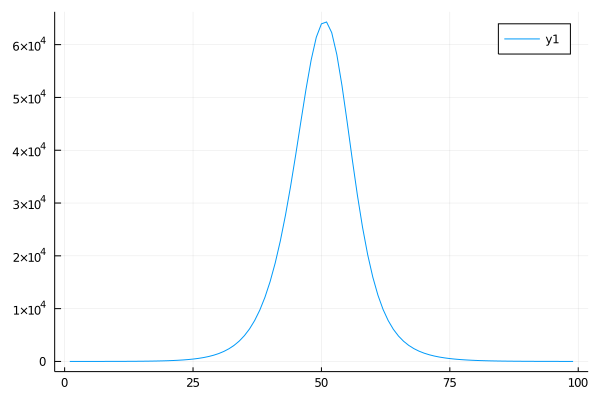

In [25]:
# CONTROL SIMULATION

populationC = Population_Params(G, M, nᵢᵍ, kᵍ, kᵍ_h, kᵍ_w, C, pᵍ, edgelist, Rᵢⱼ, sᵢ, ξ, σ)
epi_paramsC = Epidemic_Params(βᴵ, βᴬ, ηᵍ, αᵍ, μᵍ, θᵍ, γᵍ, ζᵍ, λᵍ, ωᵍ, ψᵍ, χᵍ, G, M, 100)

# Run the model
reset_params!(epi_paramsC, populationC)
set_initial_infected!(epi_paramsC, populationC, E₀, A₀, I₀)
run_epidemic_spreading_mmca!(epi_paramsC, populationC; verbose = false)

incidenceC, prevalenceC = calculate_incidence(epi_paramsC, populationC)
compartmentsC = compartments_as_matrix(epi_paramsC, populationC)

plot(sum(incidenceC, dims=1)[1,:])

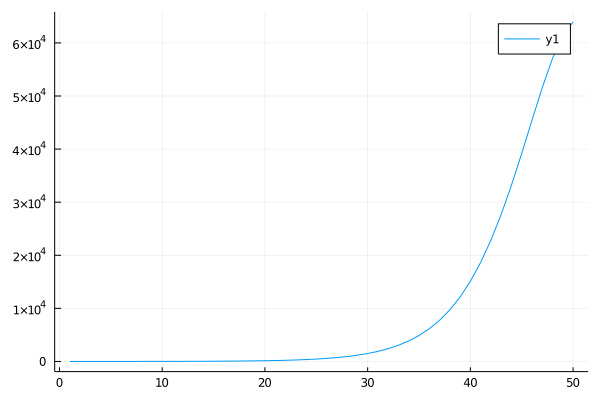

In [31]:
# Partial sim 1

population1 = Population_Params(G, M, nᵢᵍ, kᵍ, kᵍ_h, kᵍ_w, C, pᵍ, edgelist, Rᵢⱼ, sᵢ, ξ, σ)
epi_params1 = Epidemic_Params(βᴵ, βᴬ, ηᵍ, αᵍ, μᵍ, θᵍ, γᵍ, ζᵍ, λᵍ, ωᵍ, ψᵍ, χᵍ, G, M, 51)

# Run the model
reset_params!(epi_params1, population1)
set_initial_infected!(epi_params1, population1, E₀, A₀, I₀)
run_epidemic_spreading_mmca!(epi_params1, population1; verbose = false)

incidence1, prevalence1 = calculate_incidence(epi_params1, population1)
compartments1 = compartments_as_matrix(epi_params1, population1)

plot(sum(incidence1, dims=1)[1,:])

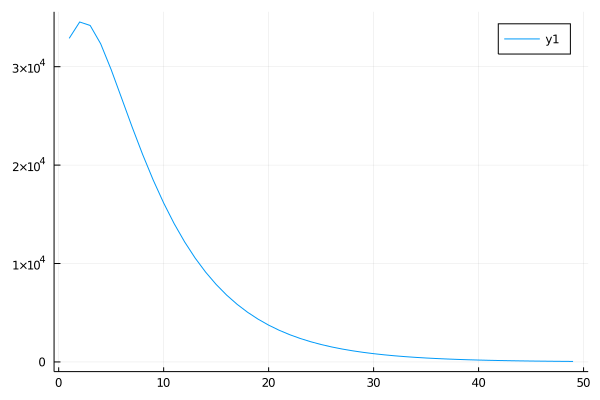

In [62]:
# Partial sim 2
initial_compartments = compartments1[:,:,epi_params1.T,:]

population2 = Population_Params(G, M, nᵢᵍ, kᵍ, kᵍ_h, kᵍ_w, C, pᵍ, edgelist, Rᵢⱼ, sᵢ, ξ, σ)
epi_params2 = Epidemic_Params(βᴵ*0.5, βᴬ*0.5, ηᵍ, αᵍ, μᵍ, θᵍ, γᵍ, ζᵍ, λᵍ, ωᵍ, ψᵍ, χᵍ, G, M, 50)

# Run the model
reset_params!(epi_params2, population2)
set_compartments!(epi_params2, initial_compartments)
run_epidemic_spreading_mmca!(epi_params2, population2; verbose = false)

incidence2, prevalence2 = calculate_incidence(epi_params2, population2)
compartments2 = compartments_as_matrix(epi_params2, population2)

plot(sum(incidence2, dims=1)[1,:])

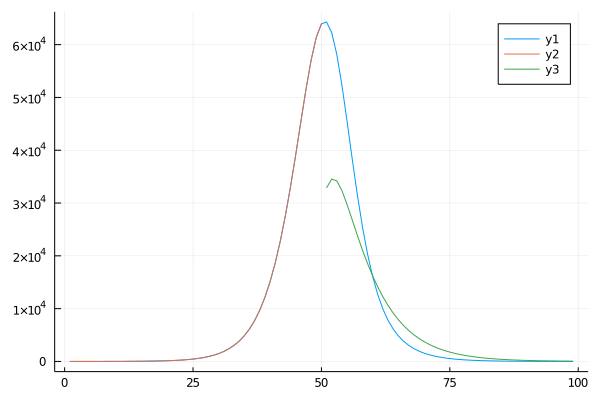

In [63]:
# Y2 = sum(hcat(incidence1, incidence2), dims=1)[1,:]
plot(sum(incidenceC, dims=1)[1,:])
plot!(1:50, sum(incidence1, dims=1)[1,:])
plot!(51:99, sum(incidence2, dims=1)[1,:])

In [57]:
prevalence2

5×50 Array{Float64,2}:
  23845.1   26828.9   29799.5   32631.4  …   48162.0   48162.4   48162.8
  49112.1   54954.0   60718.1   66169.9      95862.1   95863.0   95863.7
  64934.7   73796.6   82800.0   91558.9     143553.0  143554.0  143555.0
 153692.0  171054.0  187999.0  203865.0     288461.0  288463.0  288465.0
 203406.0  226478.0  249028.0  270173.0     383552.0  383555.0  383558.0

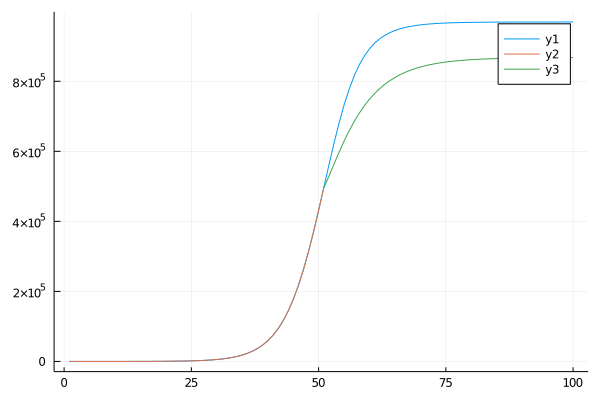

In [64]:
plot(sum(prevalenceC, dims=1)[1,:])
plot!(1:51, sum(prevalence1, dims=1)[1,:])
plot!(51:100, sum(prevalence2, dims=1)[1,:])

### Aqui vemos la continuidad en la Prevalencia, pero no en la Incidencia!
Ocurre principalmente porque la segunda ventana usa un Beta distinto, lo que hace que el salto que pegue, en cada paso (incluido el primero), sea mayor
Piensa que con la incidencia estamos viendo la tasa de cambio de la Prevalencia. La prevalencia si que es una suma directa de compartimentos, asi que si la inicializamos bien podemos asegurar la continuidad. Pero la incidencia no depende tanto del valor neto de prevalencia (un poco si, si hay mas infectados hay mas probabilidad de contagios) sino del Beta.


Tengo dos opciones:
- Seguir como hasta ahora y centrarme en predecir la prevalencia
- Centrarme en predecir la incidencia. Si quiero centrarme en predecir la incidencia, tengo que conseguir igualar la tasa de cambio, en lugar del valor total de los compartimentos.. esto es, fijar un valor de compartimentos que asegure una tasa de cambio (incidencia) igual a la empirica. Y.. como hago esto??

Esto me recuerda demasiado a esos ejercicios de mates y Dibujo tecnico de encontrar el valor a que asegure la continuidad y la primera derivada en t=t1

Inevitablemente si quiero ajustar tanto prevalencia (posición) como incidencia (velocidad), tengo que poder ajustar la aceleración..